In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings     # 경고표시 잠시 숨김
warnings.filterwarnings(action = "ignore")

import matplotlib.font_manager as fm    # 한글폰트
font_name = fm.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family = font_name)

import matplotlib as mpl    # - 해결
mpl.rcParams["axes.unicode_minus"] = False

## 게임시장 PreProcessing

### (1) 데이터 불러오기

In [3]:
market = pd.read_csv("data/gamesales_all.csv", index_col = "기업명", thousands = ",")
market

,1Q2017,2Q2017,3Q2017,4Q2017,1Q2018,2Q2018,3Q2018,4Q2018,1Q2019,2Q2019,3Q2019,4Q2019,1Q2020,2Q2020,3Q2020,4Q2020,1Q2021,2Q2021,3Q2021
기업명,,,,,,,,,,,,,,,,,,,
넥슨,747920000000,4.706400e+11,6.039800e+11,5.267500e+11,905140000000,4.779400e+11,6.933200e+11,4.608100e+11,930770000000,538650000000,523570000000,492430000000,827620000000,644660000000,794120000000,663840000000,883130000000,560090000000,758900000000
엔씨소프트,193604437699,2.100426e+11,6.765104e+11,4.664785e+11,428353232636,3.871960e+11,3.504243e+11,3.639399e+11,320780646708,361589304567,346767144643,496730551069,694135537552,493338134342,536230859456,518726405210,472809838972,494934150122,452345153241
넷마블,536364269561,3.504671e+11,3.857885e+11,3.961568e+11,311222345984,2.903655e+11,2.964172e+11,2.618605e+11,270413626323,302855803868,380856429363,297710370485,289380300184,399354780959,346015025304,343679368939,326423842260,332480334884,358598844725
카카오게임즈,163240249674,NaN,NaN,NaN,343580724463,NaN,NaN,NaN,75197065671,75504911656,73368414445,98321355883,75277643068,75568033310,112417315165,114740058385,86853850195,83185416677,411391668000
NHN,69054669048,6.502051e+10,6.008202e+10,6.367937e+10,67208340955,5.661039e+10,5.640247e+10,6.024934e+10,63686216849,62540566667,65669292553,69188336406,71807506793,76310350310,64345661640,77961417020,80800952153,78018639638,79395057323
컴투스,116557364947,1.251704e+11,1.216893e+11,1.285194e+11,112760007105,1.240336e+11,1.194104e+11,1.232013e+11,105714556480,120929636850,115007494156,120526477484,97394440590,147017391995,126552080894,132039132754,112025401138,147441969491,108586351747
데브시스터즈,4098716262,3.180811e+09,2.805405e+09,7.379099e+09,6383785952,8.239278e+09,1.075255e+10,1.099512e+10,8821789419,8423601851,8679151474,11858752299,18324005517,17110945694,17721480915,17595994537,105361179439,95770593740,67102457313
그라비티,23352000000,2.702800e+10,2.372200e+10,6.752100e+10,66311000000,6.302600e+10,4.420100e+10,1.132320e+11,133623000000,78127000000,77566000000,71651000000,73260000000,88458000000,131795000000,112440000000,105059000000,83611000000,128670000000
펄어비스,27600000000,3.300000e+10,2.264229e+10,2.064892e+10,75517551993,1.126822e+11,1.169865e+11,9.957776e+10,135976042985,152273164329,134401715191,122174190169,133187334614,131666917725,118298861823,105615729587,100894814458,88520394529,96399607134


In [83]:
market.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 넥슨 to 베스파
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1Q2017  16 non-null     int64  
 1   2Q2017  14 non-null     float64
 2   3Q2017  14 non-null     float64
 3   4Q2017  14 non-null     float64
 4   1Q2018  16 non-null     int64  
 5   2Q2018  15 non-null     float64
 6   3Q2018  15 non-null     float64
 7   4Q2018  15 non-null     float64
 8   1Q2019  16 non-null     int64  
 9   2Q2019  16 non-null     int64  
 10  3Q2019  16 non-null     int64  
 11  4Q2019  16 non-null     int64  
 12  1Q2020  16 non-null     int64  
 13  2Q2020  16 non-null     int64  
 14  3Q2020  16 non-null     int64  
 15  4Q2020  16 non-null     int64  
 16  1Q2021  16 non-null     int64  
 17  2Q2021  16 non-null     int64  
 18  3Q2021  16 non-null     int64  
dtypes: float64(6), int64(13)
memory usage: 2.5+ KB


In [17]:
# 결측치 확인

market.isnull().sum()

1Q2017    0
2Q2017    2
3Q2017    2
4Q2017    2
1Q2018    0
2Q2018    1
3Q2018    1
4Q2018    1
1Q2019    0
2Q2019    0
3Q2019    0
4Q2019    0
1Q2020    0
2Q2020    0
3Q2020    0
4Q2020    0
1Q2021    0
2Q2021    0
3Q2021    0
dtype: int64

### (2) 결측치 처리

In [4]:
##### 카카오게임즈의 1Q2017, 2Q2018값은 한 해동안의 매출액이다. 이를 4분기로 나눠 null값 대체

marketT = market.T

marketT["카카오게임즈"] = marketT["카카오게임즈"].fillna(marketT.loc["1Q2017", "카카오게임즈"]/4)
marketT

기업명,넥슨,엔씨소프트,넷마블,카카오게임즈,NHN,컴투스,데브시스터즈,그라비티,펄어비스,웹젠,네오위즈,위메이드,게임빌,선데이토즈,엠게임,베스파
1Q2017,7.479200e+11,1.936044e+11,5.363643e+11,1.632402e+11,6.905467e+10,1.165574e+11,4.098716e+09,2.335200e+10,2.760000e+10,4.311852e+10,2.239900e+10,2.284704e+10,2.044557e+10,2.071543e+10,6.623387e+09,3.111532e+10
2Q2017,4.706400e+11,2.100426e+11,3.504671e+11,4.081006e+10,6.502051e+10,1.251704e+11,3.180811e+09,2.702800e+10,3.300000e+10,4.374373e+10,2.814523e+10,9.550172e+09,2.073229e+10,1.546168e+10,7.751914e+09,NaN
3Q2017,6.039800e+11,6.765104e+11,3.857885e+11,4.081006e+10,6.008202e+10,1.216893e+11,2.805405e+09,2.372200e+10,2.264229e+10,3.583815e+10,2.722588e+10,5.972940e+09,1.597459e+10,1.423494e+10,6.385205e+09,NaN
4Q2017,5.267500e+11,4.664785e+11,3.961568e+11,4.081006e+10,6.367937e+10,1.285194e+11,7.379099e+09,6.752100e+10,2.064892e+10,4.356698e+10,2.707948e+10,5.603457e+09,1.347636e+10,1.468302e+10,6.783741e+09,NaN
1Q2018,9.051400e+11,4.283532e+11,3.112223e+11,3.435807e+11,6.720834e+10,1.127600e+11,6.383786e+09,6.631100e+10,7.551755e+10,5.468379e+10,4.693201e+10,5.630660e+09,1.325994e+10,1.801977e+10,6.879186e+09,1.207626e+10
2Q2018,4.779400e+11,3.871960e+11,2.903655e+11,4.081006e+10,5.661039e+10,1.240336e+11,8.239278e+09,6.302600e+10,1.126822e+11,4.891285e+10,4.508881e+10,5.056010e+09,1.175686e+10,2.007037e+10,6.735320e+09,2.892966e+10
3Q2018,6.933200e+11,3.504243e+11,2.964172e+11,4.081006e+10,5.640247e+10,1.194104e+11,1.075255e+10,4.420100e+10,1.169865e+11,6.392970e+10,4.922254e+10,4.491272e+09,1.107755e+10,1.941612e+10,6.035670e+09,4.058498e+10
4Q2018,4.608100e+11,3.639399e+11,2.618605e+11,4.081006e+10,6.024934e+10,1.232013e+11,1.099512e+10,1.132320e+11,9.957776e+10,2.188770e+11,4.437181e+10,4.413435e+09,2.837260e+10,1.837560e+10,7.651799e+09,4.289566e+10
1Q2019,9.307700e+11,3.207806e+11,2.704136e+11,7.519707e+10,6.368622e+10,1.057146e+11,8.821789e+09,1.336230e+11,1.359760e+11,3.983891e+10,6.145712e+10,4.497888e+09,1.836826e+10,1.756058e+10,9.593954e+09,3.247708e+10
2Q2019,5.386500e+11,3.615893e+11,3.028558e+11,7.550491e+10,6.254057e+10,1.209296e+11,8.423602e+09,7.812700e+10,1.522732e+11,4.338211e+10,4.569879e+10,4.409881e+09,1.642097e+10,1.636534e+10,8.328254e+09,2.308949e+10


In [5]:
##### 베스파도 똑같이 진행, 1Q2017를 4분기로 나눠 null값 대체

marketT["베스파"] = marketT["베스파"].fillna(marketT.loc["1Q2017", "베스파"]/4)

marketT

기업명,넥슨,엔씨소프트,넷마블,카카오게임즈,NHN,컴투스,데브시스터즈,그라비티,펄어비스,웹젠,네오위즈,위메이드,게임빌,선데이토즈,엠게임,베스파
1Q2017,7.479200e+11,1.936044e+11,5.363643e+11,1.632402e+11,6.905467e+10,1.165574e+11,4.098716e+09,2.335200e+10,2.760000e+10,4.311852e+10,2.239900e+10,2.284704e+10,2.044557e+10,2.071543e+10,6.623387e+09,3.111532e+10
2Q2017,4.706400e+11,2.100426e+11,3.504671e+11,4.081006e+10,6.502051e+10,1.251704e+11,3.180811e+09,2.702800e+10,3.300000e+10,4.374373e+10,2.814523e+10,9.550172e+09,2.073229e+10,1.546168e+10,7.751914e+09,7.778830e+09
3Q2017,6.039800e+11,6.765104e+11,3.857885e+11,4.081006e+10,6.008202e+10,1.216893e+11,2.805405e+09,2.372200e+10,2.264229e+10,3.583815e+10,2.722588e+10,5.972940e+09,1.597459e+10,1.423494e+10,6.385205e+09,7.778830e+09
4Q2017,5.267500e+11,4.664785e+11,3.961568e+11,4.081006e+10,6.367937e+10,1.285194e+11,7.379099e+09,6.752100e+10,2.064892e+10,4.356698e+10,2.707948e+10,5.603457e+09,1.347636e+10,1.468302e+10,6.783741e+09,7.778830e+09
1Q2018,9.051400e+11,4.283532e+11,3.112223e+11,3.435807e+11,6.720834e+10,1.127600e+11,6.383786e+09,6.631100e+10,7.551755e+10,5.468379e+10,4.693201e+10,5.630660e+09,1.325994e+10,1.801977e+10,6.879186e+09,1.207626e+10
2Q2018,4.779400e+11,3.871960e+11,2.903655e+11,4.081006e+10,5.661039e+10,1.240336e+11,8.239278e+09,6.302600e+10,1.126822e+11,4.891285e+10,4.508881e+10,5.056010e+09,1.175686e+10,2.007037e+10,6.735320e+09,2.892966e+10
3Q2018,6.933200e+11,3.504243e+11,2.964172e+11,4.081006e+10,5.640247e+10,1.194104e+11,1.075255e+10,4.420100e+10,1.169865e+11,6.392970e+10,4.922254e+10,4.491272e+09,1.107755e+10,1.941612e+10,6.035670e+09,4.058498e+10
4Q2018,4.608100e+11,3.639399e+11,2.618605e+11,4.081006e+10,6.024934e+10,1.232013e+11,1.099512e+10,1.132320e+11,9.957776e+10,2.188770e+11,4.437181e+10,4.413435e+09,2.837260e+10,1.837560e+10,7.651799e+09,4.289566e+10
1Q2019,9.307700e+11,3.207806e+11,2.704136e+11,7.519707e+10,6.368622e+10,1.057146e+11,8.821789e+09,1.336230e+11,1.359760e+11,3.983891e+10,6.145712e+10,4.497888e+09,1.836826e+10,1.756058e+10,9.593954e+09,3.247708e+10
2Q2019,5.386500e+11,3.615893e+11,3.028558e+11,7.550491e+10,6.254057e+10,1.209296e+11,8.423602e+09,7.812700e+10,1.522732e+11,4.338211e+10,4.569879e+10,4.409881e+09,1.642097e+10,1.636534e+10,8.328254e+09,2.308949e+10


In [6]:
market = marketT.T

In [7]:
market

,1Q2017,2Q2017,3Q2017,4Q2017,1Q2018,2Q2018,3Q2018,4Q2018,1Q2019,2Q2019,3Q2019,4Q2019,1Q2020,2Q2020,3Q2020,4Q2020,1Q2021,2Q2021,3Q2021
기업명,,,,,,,,,,,,,,,,,,,
넥슨,7.479200e+11,4.706400e+11,6.039800e+11,5.267500e+11,9.051400e+11,4.779400e+11,6.933200e+11,4.608100e+11,9.307700e+11,5.386500e+11,5.235700e+11,4.924300e+11,8.276200e+11,6.446600e+11,7.941200e+11,6.638400e+11,8.831300e+11,5.600900e+11,7.589000e+11
엔씨소프트,1.936044e+11,2.100426e+11,6.765104e+11,4.664785e+11,4.283532e+11,3.871960e+11,3.504243e+11,3.639399e+11,3.207806e+11,3.615893e+11,3.467671e+11,4.967306e+11,6.941355e+11,4.933381e+11,5.362309e+11,5.187264e+11,4.728098e+11,4.949342e+11,4.523452e+11
넷마블,5.363643e+11,3.504671e+11,3.857885e+11,3.961568e+11,3.112223e+11,2.903655e+11,2.964172e+11,2.618605e+11,2.704136e+11,3.028558e+11,3.808564e+11,2.977104e+11,2.893803e+11,3.993548e+11,3.460150e+11,3.436794e+11,3.264238e+11,3.324803e+11,3.585988e+11
카카오게임즈,1.632402e+11,4.081006e+10,4.081006e+10,4.081006e+10,3.435807e+11,4.081006e+10,4.081006e+10,4.081006e+10,7.519707e+10,7.550491e+10,7.336841e+10,9.832136e+10,7.527764e+10,7.556803e+10,1.124173e+11,1.147401e+11,8.685385e+10,8.318542e+10,4.113917e+11
NHN,6.905467e+10,6.502051e+10,6.008202e+10,6.367937e+10,6.720834e+10,5.661039e+10,5.640247e+10,6.024934e+10,6.368622e+10,6.254057e+10,6.566929e+10,6.918834e+10,7.180751e+10,7.631035e+10,6.434566e+10,7.796142e+10,8.080095e+10,7.801864e+10,7.939506e+10
컴투스,1.165574e+11,1.251704e+11,1.216893e+11,1.285194e+11,1.127600e+11,1.240336e+11,1.194104e+11,1.232013e+11,1.057146e+11,1.209296e+11,1.150075e+11,1.205265e+11,9.739444e+10,1.470174e+11,1.265521e+11,1.320391e+11,1.120254e+11,1.474420e+11,1.085864e+11
데브시스터즈,4.098716e+09,3.180811e+09,2.805405e+09,7.379099e+09,6.383786e+09,8.239278e+09,1.075255e+10,1.099512e+10,8.821789e+09,8.423602e+09,8.679151e+09,1.185875e+10,1.832401e+10,1.711095e+10,1.772148e+10,1.759599e+10,1.053612e+11,9.577059e+10,6.710246e+10
그라비티,2.335200e+10,2.702800e+10,2.372200e+10,6.752100e+10,6.631100e+10,6.302600e+10,4.420100e+10,1.132320e+11,1.336230e+11,7.812700e+10,7.756600e+10,7.165100e+10,7.326000e+10,8.845800e+10,1.317950e+11,1.124400e+11,1.050590e+11,8.361100e+10,1.286700e+11
펄어비스,2.760000e+10,3.300000e+10,2.264229e+10,2.064892e+10,7.551755e+10,1.126822e+11,1.169865e+11,9.957776e+10,1.359760e+11,1.522732e+11,1.344017e+11,1.221742e+11,1.331873e+11,1.316669e+11,1.182989e+11,1.056157e+11,1.008948e+11,8.852039e+10,9.639961e+10


In [28]:
market.isnull().sum()     # 결측치 없음 확인

1Q2017    0
2Q2017    0
3Q2017    0
4Q2017    0
1Q2018    0
2Q2018    0
3Q2018    0
4Q2018    0
1Q2019    0
2Q2019    0
3Q2019    0
4Q2019    0
1Q2020    0
2Q2020    0
3Q2020    0
4Q2020    0
1Q2021    0
2Q2021    0
3Q2021    0
dtype: int64

### (3) 게임시장 매출액 분기별 합계

In [8]:
#####  연도별 매출 합계(Sum)를 구해 행에 추가

market.loc["Sum", :] = market.sum(axis = 0)

In [9]:
market

,1Q2017,2Q2017,3Q2017,4Q2017,1Q2018,2Q2018,3Q2018,4Q2018,1Q2019,2Q2019,3Q2019,4Q2019,1Q2020,2Q2020,3Q2020,4Q2020,1Q2021,2Q2021,3Q2021
기업명,,,,,,,,,,,,,,,,,,,
넥슨,7.479200e+11,4.706400e+11,6.039800e+11,5.267500e+11,9.051400e+11,4.779400e+11,6.933200e+11,4.608100e+11,9.307700e+11,5.386500e+11,5.235700e+11,4.924300e+11,8.276200e+11,6.446600e+11,7.941200e+11,6.638400e+11,8.831300e+11,5.600900e+11,7.589000e+11
엔씨소프트,1.936044e+11,2.100426e+11,6.765104e+11,4.664785e+11,4.283532e+11,3.871960e+11,3.504243e+11,3.639399e+11,3.207806e+11,3.615893e+11,3.467671e+11,4.967306e+11,6.941355e+11,4.933381e+11,5.362309e+11,5.187264e+11,4.728098e+11,4.949342e+11,4.523452e+11
넷마블,5.363643e+11,3.504671e+11,3.857885e+11,3.961568e+11,3.112223e+11,2.903655e+11,2.964172e+11,2.618605e+11,2.704136e+11,3.028558e+11,3.808564e+11,2.977104e+11,2.893803e+11,3.993548e+11,3.460150e+11,3.436794e+11,3.264238e+11,3.324803e+11,3.585988e+11
카카오게임즈,1.632402e+11,4.081006e+10,4.081006e+10,4.081006e+10,3.435807e+11,4.081006e+10,4.081006e+10,4.081006e+10,7.519707e+10,7.550491e+10,7.336841e+10,9.832136e+10,7.527764e+10,7.556803e+10,1.124173e+11,1.147401e+11,8.685385e+10,8.318542e+10,4.113917e+11
NHN,6.905467e+10,6.502051e+10,6.008202e+10,6.367937e+10,6.720834e+10,5.661039e+10,5.640247e+10,6.024934e+10,6.368622e+10,6.254057e+10,6.566929e+10,6.918834e+10,7.180751e+10,7.631035e+10,6.434566e+10,7.796142e+10,8.080095e+10,7.801864e+10,7.939506e+10
컴투스,1.165574e+11,1.251704e+11,1.216893e+11,1.285194e+11,1.127600e+11,1.240336e+11,1.194104e+11,1.232013e+11,1.057146e+11,1.209296e+11,1.150075e+11,1.205265e+11,9.739444e+10,1.470174e+11,1.265521e+11,1.320391e+11,1.120254e+11,1.474420e+11,1.085864e+11
데브시스터즈,4.098716e+09,3.180811e+09,2.805405e+09,7.379099e+09,6.383786e+09,8.239278e+09,1.075255e+10,1.099512e+10,8.821789e+09,8.423602e+09,8.679151e+09,1.185875e+10,1.832401e+10,1.711095e+10,1.772148e+10,1.759599e+10,1.053612e+11,9.577059e+10,6.710246e+10
그라비티,2.335200e+10,2.702800e+10,2.372200e+10,6.752100e+10,6.631100e+10,6.302600e+10,4.420100e+10,1.132320e+11,1.336230e+11,7.812700e+10,7.756600e+10,7.165100e+10,7.326000e+10,8.845800e+10,1.317950e+11,1.124400e+11,1.050590e+11,8.361100e+10,1.286700e+11
펄어비스,2.760000e+10,3.300000e+10,2.264229e+10,2.064892e+10,7.551755e+10,1.126822e+11,1.169865e+11,9.957776e+10,1.359760e+11,1.522732e+11,1.344017e+11,1.221742e+11,1.331873e+11,1.316669e+11,1.182989e+11,1.056157e+11,1.008948e+11,8.852039e+10,9.639961e+10


In [10]:
market.to_csv("checkpoint/gamesales_all_checkpoint.csv", encoding= "utf=8")

Text(4Q2019, 2500000000000.0, '코로나19 발생')

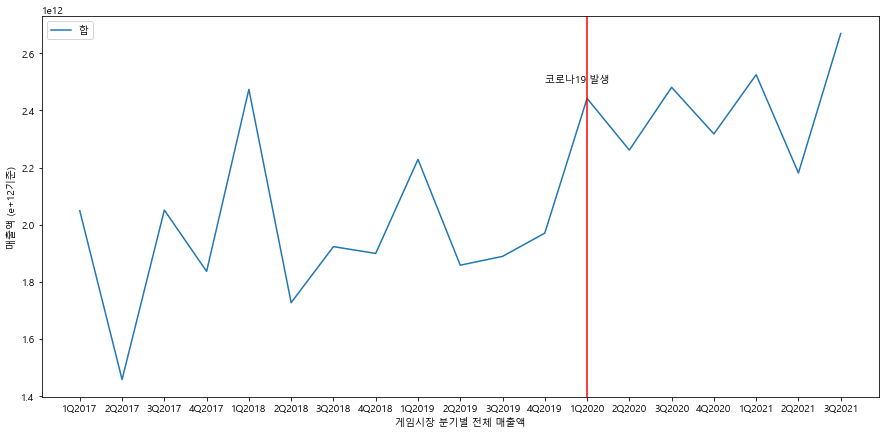

In [31]:
plt.figure(figsize=(15, 7))
plt.plot(market.T["Sum"])
plt.legend("합")

plt.xlabel("게임시장 분기별 전체 매출액")
plt.ylabel("매출액 (e+12기준)")

plt.axvline(x = "1Q2020", color = "r")
plt.text('4Q2019',2.500000e+12, "코로나19 발생")

-----

### 지금부터는 참고용 

### (4) 3사(넥슨, 엔씨소프트, 넷마블)의 분기별 매출 그래프

Text(4Q2019, 900000000000.0, '코로나19 발생')

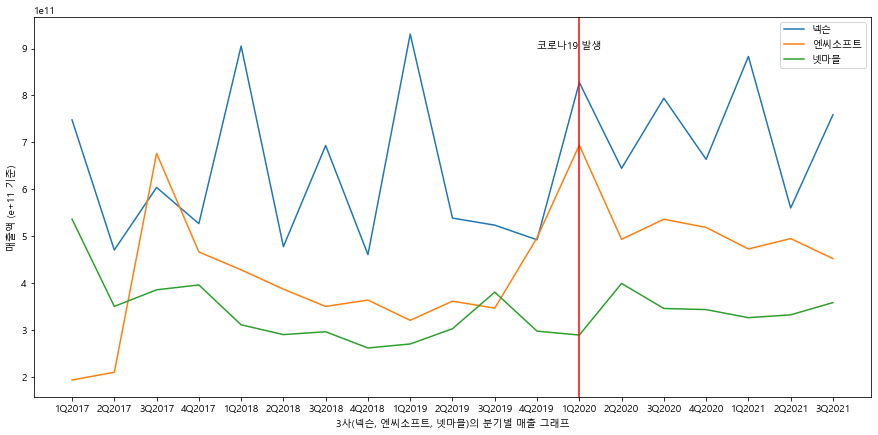

In [244]:
names = market.iloc[:3, ].index
names

plt.figure(figsize=(15, 7))
plt.plot(market.iloc[:3, ].T)
plt.legend(names)

plt.xlabel("3사(넥슨, 엔씨소프트, 넷마블)의 분기별 매출 그래프")
plt.ylabel("매출액 (e+11 기준)")


plt.axvline(x = "1Q2020", color = "r")
plt.text('4Q2019',9.000000e+11, "코로나19 발생")

### (5) 3사 제외 게임사들의 분기별 매출

Text(4Q2019, 200000000000.0, '코로나19 발생')

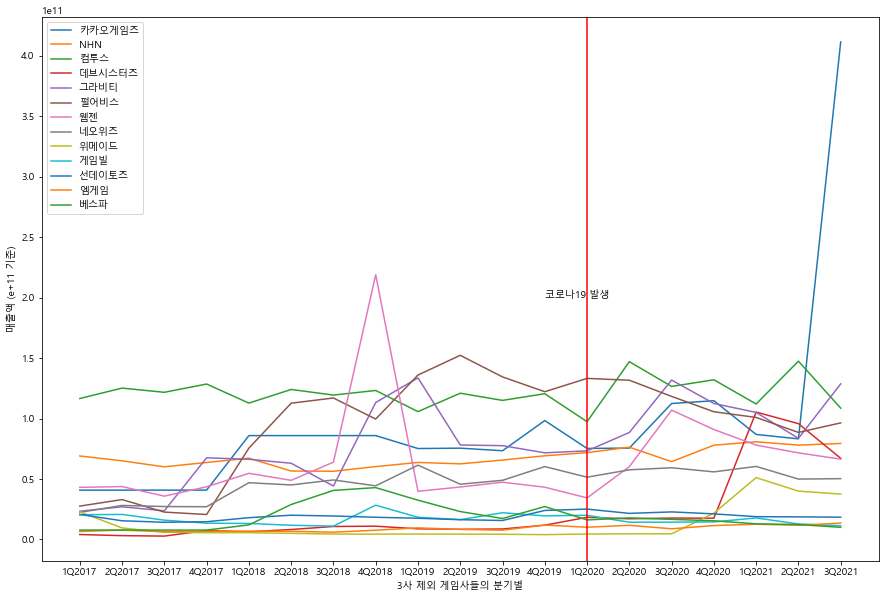

In [256]:
names = market.iloc[3:-1, ].index
names

plt.figure(figsize=(15, 10))
plt.plot(market.iloc[3:-1, ].T)
plt.legend(names)

plt.xlabel("3사 제외 게임사들의 분기별")
plt.ylabel("매출액 (e+11 기준)")

plt.axvline(x = "1Q2020", color = "r")
plt.text('4Q2019',2.000000e+11, "코로나19 발생")

### (6) 전체 게임사의 분기별 매출 및 합계

Text(4Q2019, 900000000000.0, '코로나19 발생')

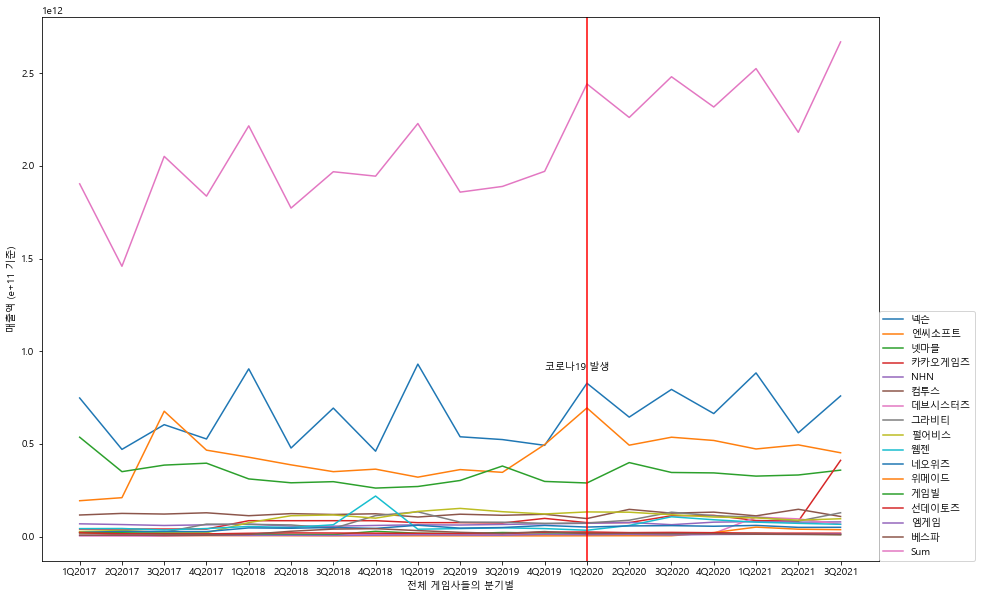

In [257]:
names = market.iloc[:, ].index
names

plt.figure(figsize=(15, 10))
plt.plot(market.T)
plt.legend(names, loc = (1.0, 0))

plt.xlabel("전체 게임사들의 분기별")
plt.ylabel("매출액 (e+11 기준)")

plt.axvline(x = "1Q2020", color = "r")
plt.text('4Q2019',9.000000e+11, "코로나19 발생")


# 넥슨의 매출이 곧 전체 게임사 매출의 합(SUM)을 좌지우지하는 것을 알 수 있다.